<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/NN_PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

### **A Simple Layer of Neurons**

A simple layer of neurons can be represented with a basic `nn.Linear(input_size, output_size)` instance. The first parameter is the number of inputs, while the second is the number of outputs

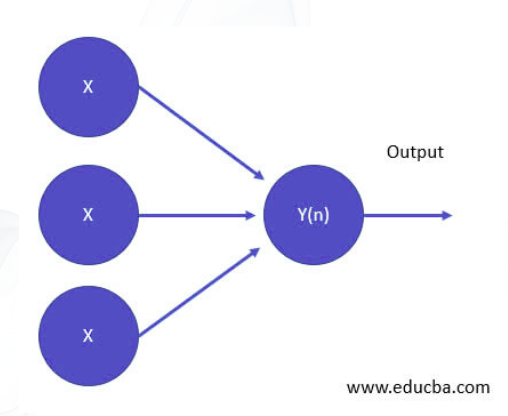

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3, 1)

    def forward(self, x):
        return self.fc(x)

In [ ]:
model = SimpleNet()

In [ ]:
input = torch.randn(1, 3)
input

tensor([[-0.8060,  0.4649,  1.3162]])

In [ ]:
output = model(input)
output

tensor([[0.2806]], grad_fn=<AddmmBackward0>)

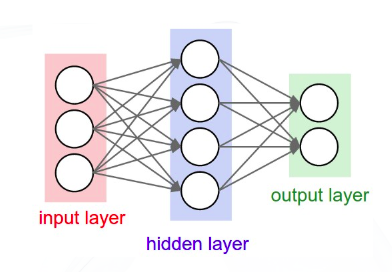

In [ ]:
class TwoLayerNetwork(nn.Module):
    def __init__(self):
        # Architecture of the network.
        super().__init__()
        self.input_layer = nn.Linear(3, 3)
        self.hidden_layer = nn.Linear(3, 4)
        self.act = nn.ReLU()
        self.output_layer = nn.Linear(4, 2)
        self.out_act = nn.Sigmoid()


    def forward(self, x):
        # Forward propagation steps.
        # Step 1: pass the signal x through the input layer with no activation.
        x = self.input_layer(x)

        # Step 2: pass the signal through the hidden layer.
        x = self.hidden_layer(x)

        # Step 3: pass the signal through the activation function.
        x = self.act(x)

        # Step 4: pass the signal through the output layer.
        x = self.output_layer(x)

        # Step 5: pass the signal through the output activation.
        x = self.out_act(x)

        return x

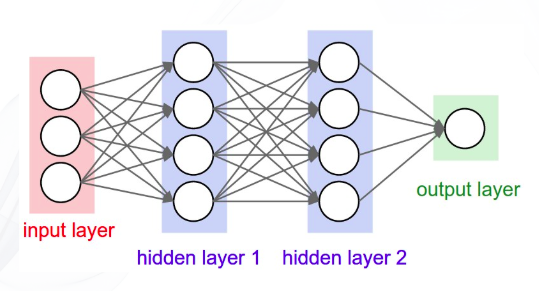

In [ ]:
class ThreeLayerNetwork(nn.Module):
    def __init__(self):
        # Architecture of the network.
        super().__init__()
        self.hidden1 = nn.Linear(3, 4)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(4, 4)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(4, 1)
        self.sig = nn.Sigmoid()


    def forward(self, x):
        # Forward pass through the network.
        x = self.relu1(self.hidden1(x))
        x = self.relu2(self.hidden2(x))
        x = self.sig(self.output(x))
        return x

### Now the training loop for any specific problem.

We will solve the XOR problem

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

/tmp/ipython-input-1980497515.py:28: RuntimeWarning: divide by zero encountered in divide
  y_vals = -(w[0] * x_vals + b) / w[1]


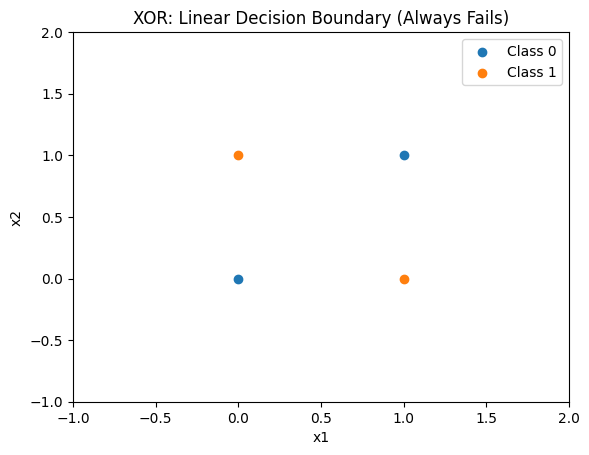

In [ ]:
# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

fig, ax = plt.subplots()

for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}")

ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()

line, = ax.plot([], [])
x_vals = np.linspace(-1, 2, 200)

def update(frame):
    angle = frame * 0.1
    w = np.array([np.cos(angle), np.sin(angle)])
    b = 0.0
    y_vals = -(w[0] * x_vals + b) / w[1]
    line.set_data(x_vals, y_vals)
    ax.set_title("XOR: Linear Decision Boundary (Always Fails)")
    return line,

anim = FuncAnimation(fig, update, frames=100, interval=100)

HTML(anim.to_jshtml())

In [ ]:
class XorNetwork(nn.Module):
    def __init__(self):
        # Architecture of the network.
        super().__init__()
        self.hidden1 = nn.Linear(2, 4)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(4, 4)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(4, 1)
        self.sig = nn.Sigmoid()


    def forward(self, x):
        # Forward pass through the network.
        x = self.relu1(self.hidden1(x))
        x = self.relu2(self.hidden2(x))
        x = self.sig(self.output(x))
        return x

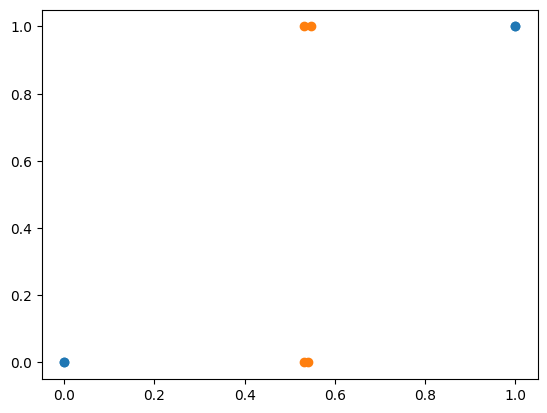

In [ ]:
plt.scatter(y, y)
model = XorNetwork()
y_hat = model(torch.from_numpy(X).float())
y_hat_np = y_hat.detach().numpy()
plt.scatter(y_hat_np, y)

In [ ]:
# Training loop for the XorNetwork.

epochs = 100_000
lr = 0.001

losses = []

X_train = torch.from_numpy(X).float()
y_train = torch.from_numpy(y).float().reshape((4, 1))

# display(X_train.shape, y_train.shape)

model = XorNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.BCELoss()

for epoch in range(epochs):
    y_hat = model(X_train)

    # Zero_grad - clear previous gradients calculated by the autograd
    optimizer.zero_grad()

    # Do backward calculation of gradients.
    # gradient = X * (y_pred - y) * g'(x)
    loss = criterion(y_hat, y_train)
    losses.append(loss.item())
    loss.backward()

    # Update the parameters using the specified optimizer.
    # dm = dm - lr * gradient
    optimizer.step()

    if epoch % 10000 == 0:
        print(f"Epoch {epoch}: Loss {loss.item()}")

Epoch 0: Loss 0.7272924184799194
Epoch 10000: Loss 0.6509954333305359
Epoch 20000: Loss 0.4154949188232422
Epoch 30000: Loss 0.10916552692651749
Epoch 40000: Loss 0.0416702926158905
Epoch 50000: Loss 0.02288508228957653
Epoch 60000: Loss 0.014819527044892311
Epoch 70000: Loss 0.010558291338384151
Epoch 80000: Loss 0.00801216159015894
Epoch 90000: Loss 0.006356389261782169


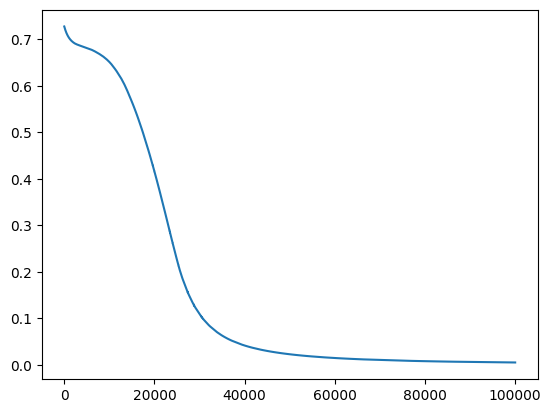

In [ ]:
plt.plot(losses)

x1  x2  y     y_hat
0   0   0  0  0.470303
1   0   1  1  0.470697
2   1   0  1  0.470477
3   1   1  0  0.470905

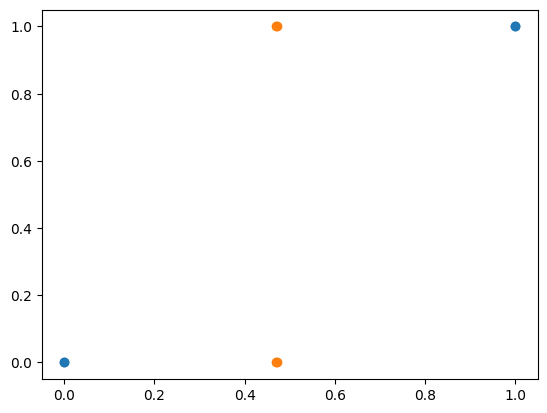

In [ ]:
plt.scatter(y, y)
model = XorNetwork()
y_hat = model(torch.from_numpy(X).float())
y_hat_np = y_hat.detach().numpy()
plt.scatter(y_hat_np, y)

# Create dataframe from X, y and y_hat
import pandas as pd

df = pd.DataFrame(X, columns=["x1", "x2"])
df["y"] = y
df["y_hat"] = y_hat_np
df.head()

In [ ]:
def plot_decision_boundary(model, X, y, device="cpu", resolution=200):
    """
    Plots the decision boundary of a trained PyTorch binary classifier.

    Args:
        model: Trained PyTorch model
        X: Input features (numpy array, shape [N, 2])
        y: Labels (numpy array, shape [N])
        device: 'cpu' or 'cuda'
        resolution: Grid resolution for the plot
    """
    model.eval()
    model.to(device)

    # Define grid limits
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )

    # Prepare grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)

    # Model prediction
    with torch.no_grad():
        preds = model(grid_tensor)
        preds = preds.squeeze().cpu().numpy()

    # Reshape predictions to grid
    Z = preds.reshape(xx.shape)

    # Plot contour and data points
    plt.figure(figsize=(5, 3))
    plt.contourf(xx, yy, Z > 0.5, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

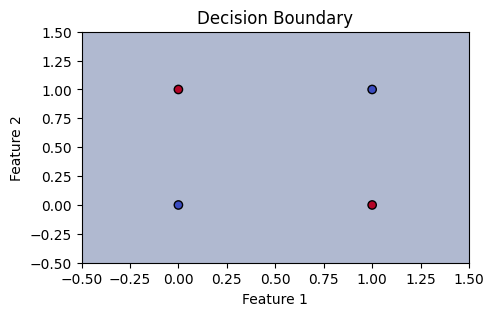

In [ ]:
plot_decision_boundary(
    model=model,
    X=X_train,
    y=y_train,
    device="cpu"
)

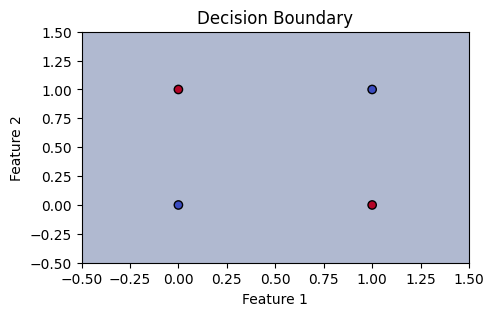

In [ ]:
model = XorNetwork()
plot_decision_boundary(
    model=model,
    X=X_train,
    y=y_train,
    device="cpu"
)